In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.exponential_fitting import fit_exponential_n, show_elbow_n

In [2]:
T_max = 60.0

Henri = {
    'FLOPS_p_W':65.396*1.e+9,
    'R_max':2.88*1.e+15,
    'Power':44*1.e3
}

LUMI = {
    'FLOPS_p_W':53.428*1.e+9,
    'R_max':379.70*1.e+15,
    'Power':7107*1.e3 	
}

qubit_power = 30*1e-3        

In [3]:
def T_layers(n, r, ent = 'full', t_one = 50*1.e-9, t_two = 50*1.e-9):
    return( r*(t_one*(2+n*(n-1)/2)+t_two*(n*(n-1))) )

def T_circ(n, r, ent = 'full', t_one = 50*1.e-9, t_two = 50*1.e-9, t_meas = 100*1.e-9):
    return(T_layers(n,r, ent=ent, t_one=t_one, t_two=t_two)+ t_meas)

def T_total(N, n, r, ent = 'full', t_one = 50*1.e-9, t_two = 50*1.e-9, t_meas = 100*1.e-9):
    return(N*T_circ(n=n, r=r, ent = 'full', t_one = 50*1.e-9, t_two = 50*1.e-9, t_meas = 100*1.e-9))

In [5]:
#x_P_F = np.load('results/N_estimates/PQ_F_sonar_X.npy') # n; simulated or not
#N_P_F = np.load('results/N_estimates/PQ_F_sonar_N.npy') # N_spread/N_SR/N_max; ZZ_reps; n

N_PQ_F_r6 = np.load('results/N_estimates/PQ_F_sonar_ZZ6.npy')

QEC = pd.read_csv('results/classical_runtime/QR_ZZ6.csv')

CR = pd.read_csv('results/classical_runtime/classical_FLOPS.csv')

In [6]:
QEC['noiseless_runtime[s]'] = T_total(QEC['N'],QEC['n'], r=6)
QEC['classical_FLOP'] = CR['FLOPS']
QEC['LUMI_E_MAX'] = LUMI['Power']*QEC['classical_FLOP']/LUMI['R_max']
QEC['LUMI_runtime'] = QEC['classical_FLOP']/LUMI['R_max']
QEC['Henri_E_MAX'] = Henri['Power']*QEC['classical_FLOP']/Henri['R_max']
QEC['Henri_runtime'] = QEC['classical_FLOP']/Henri['R_max']

In [7]:
QEC

,Unnamed: 0,n,error,N,physical_qubits,runtime_per_shot[ns],runtime_tomography[ns],total_runtime[s],power[W],Energy[J],noiseless_runtime[s],classical_FLOP,LUMI_E_MAX,LUMI_runtime,Henri_E_MAX,Henri_runtime
0,0,2,0.170342,5.030389e+03,34450.0,280000.0,840000.0,4.225526e+00,1033.50,4.367082e+03,8.048622e-03,1.374700e+04,2.573082e-07,3.620490e-14,2.100236e-07,4.773264e-12
1,1,3,0.110332,1.554656e+04,67816.0,848400.0,2545200.0,3.956909e+01,2034.48,8.050253e+04,5.285829e-02,7.776900e+04,1.455634e-06,2.048170e-13,1.188137e-06,2.700313e-11
2,2,4,0.118156,3.796311e+04,87710.0,1134000.0,3402000.0,1.291505e+02,2631.30,3.398337e+05,2.315750e-01,4.200000e+05,7.861312e-06,1.106136e-12,6.416667e-06,1.458333e-10
3,3,5,0.138103,8.147642e+04,103684.0,1542800.0,4628400.0,3.771055e+02,3110.52,1.172994e+06,7.903213e-01,2.207408e+06,4.131696e-05,5.813558e-12,3.372429e-05,7.664611e-10
4,4,6,0.121586,1.611553e+05,119560.0,1881600.0,5644800.0,9.096894e+02,3586.80,3.262874e+06,2.288405e+00,1.118194e+07,2.092969e-04,2.944940e-11,1.708352e-04,3.882618e-09
5,5,7,0.123780,3.012925e+05,217566.0,2876400.0,8629200.0,2.599913e+03,6526.98,1.696958e+07,5.905332e+00,5.467655e+07,1.023403e-03,1.439993e-10,8.353362e-04,1.898491e-08
6,6,8,0.114272,5.405331e+05,243810.0,3355200.0,10065600.0,5.440790e+03,7314.30,3.979557e+07,1.399981e+01,2.597020e+08,4.860948e-03,6.839662e-10,3.967669e-03,9.017429e-08
7,7,9,0.116041,9.396746e+05,270216.0,4093200.0,12279600.0,1.153883e+04,8106.48,9.353928e+07,3.110323e+01,1.205529e+09,2.256438e-02,3.174951e-09,1.841780e-02,4.185864e-07
8,8,10,0.117188,1.593465e+06,289980.0,4640400.0,13921200.0,2.218295e+04,8699.40,1.929783e+08,6.565077e+01,5.495397e+09,1.028596e-01,1.447300e-08,8.395745e-02,1.908124e-06
9,9,15,0.097270,1.752975e+07,376164.0,7700400.0,23101200.0,4.049583e+05,11284.92,4.569922e+09,1.668832e+03,1.296679e+13,2.427046e+02,3.415008e-05,1.981037e+02,4.502356e-03


# Visualizations

In [8]:
df_advantage_T = QEC[QEC['LUMI_runtime'] >= QEC['total_runtime[s]']]

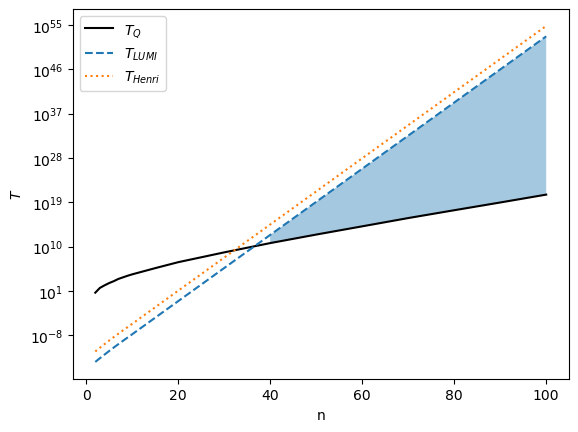

In [10]:
plt.plot(QEC['n'], QEC['total_runtime[s]'], color='black', label='$T_Q$')
plt.plot(QEC['n'], QEC['LUMI_runtime'], color='#1f77b4', linestyle='--', label='$T_{LUMI}$')
plt.plot(QEC['n'], QEC['Henri_runtime'], color='#ff7f0e', linestyle='dotted', label='$T_{Henri}$')
plt.fill_between(df_advantage_T['n'], df_advantage_T['total_runtime[s]'], df_advantage_T['LUMI_runtime'], alpha = .4)
plt.yscale('log')
plt.legend()
plt.xlabel('n')
plt.ylabel('$T$')
#plt.savefig('imgs/T_advantage.png', transparent = True)
plt.show()

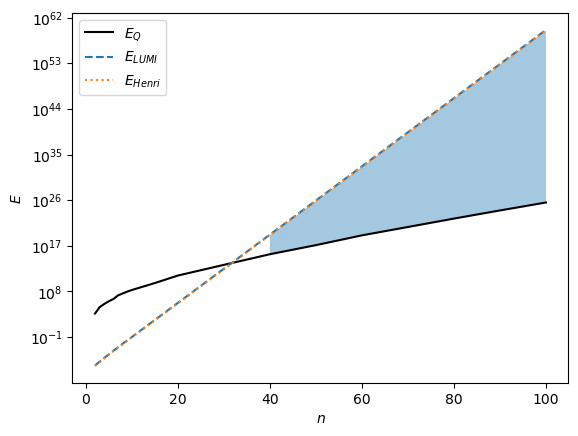

In [11]:
df_advantage_E = QEC[QEC['Henri_E_MAX'] >= QEC['Energy[J]']]

plt.plot(QEC['n'], QEC['Energy[J]'], color='black', label='$E_Q$')
plt.plot(QEC['n'], QEC['LUMI_E_MAX'], color='#1f77b4', linestyle='--', label='$E_{LUMI}$')
plt.plot(QEC['n'], QEC['Henri_E_MAX'], color='#ff7f0e', linestyle='dotted', label='$E_{Henri}$')
plt.fill_between(df_advantage_E['n'], df_advantage_E['Energy[J]'], df_advantage_E['Henri_E_MAX'], alpha = .4)
plt.yscale('log')
plt.legend()
plt.xlabel('$n$')
plt.ylabel('$E$')
plt.show()

# N_spread + N_CA

In [13]:
df_SR_PQ = pd.read_csv('results/N_estimates/SR_PQ')
df_SR_PQ_ext = pd.read_csv('results/N_estimates/SR_PQ_ext')

df_Spread_PQ = pd.read_csv('results/N_estimates/Spread_PQ')
df_Spread_PQ_ext = pd.read_csv('results/N_estimates/Spread_PQ_ext')

In [11]:
n_range_PQ = df_SR_PQ['n']
n_range_ext_PQ = df_SR_PQ_ext['n']

N_SR_PQ = df_SR_PQ['ZZ6']
N_SR_PQ_ext = df_SR_PQ_ext['ZZ6']

N_Spread_PQ = df_Spread_PQ['ZZ6']
N_Spread_PQ_ext = df_Spread_PQ_ext['ZZ6']

In [14]:
N_simulated = df_SR_PQ[['n', 'ZZ6']]
N_simulated = N_simulated.rename(columns={'ZZ6':'N_SR'})
N_simulated['N_Spread'] = df_Spread_PQ['ZZ6']
N_simulated['Simulated'] = np.ones((N_simulated.shape[0],), dtype=bool)

N_ext = df_SR_PQ_ext[['n', 'ZZ6']]
N_ext = N_ext.rename(columns={'ZZ6':'N_SR'})
N_ext['N_Spread'] = df_Spread_PQ_ext['ZZ6']
N_ext['Simulated'] = np.zeros((N_ext.shape[0],), dtype=bool)

N_all = pd.concat([N_simulated, N_ext])
N_all['N'] = N_all[['N_SR', 'N_Spread']].max(axis=1)


In [15]:
QEC = pd.read_csv('results/classical_runtime/QR_ZZ6.csv')

CR = pd.read_csv('results/classical_runtime/classical_FLOPS.csv')

In [16]:
QEC = QEC[['n', 'error', 'physical_qubits', 'runtime_per_shot[ns]', 'runtime_tomography[ns]']]

In [17]:
QEC

,n,error,physical_qubits,runtime_per_shot[ns],runtime_tomography[ns]
0,2,0.170342,34450.0,280000.0,840000.0
1,3,0.110332,67816.0,848400.0,2545200.0
2,4,0.118156,87710.0,1134000.0,3402000.0
3,5,0.138103,103684.0,1542800.0,4628400.0
4,6,0.121586,119560.0,1881600.0,5644800.0
5,7,0.123780,217566.0,2876400.0,8629200.0
6,8,0.114272,243810.0,3355200.0,10065600.0
7,9,0.116041,270216.0,4093200.0,12279600.0
8,10,0.117188,289980.0,4640400.0,13921200.0
9,15,0.097270,376164.0,7700400.0,23101200.0


In [18]:
RE = QEC.merge(N_all, on='n', how='left')
RE = RE.merge(CR, on='n', how='left')

In [19]:
RE['FT_runtime[s]'] = RE['N']*RE['runtime_tomography[ns]']*1.e-9
RE['noiseless_runtime[s]'] = T_total(RE['N'],RE['n'], r=6)
RE['classical_FLOP'] = RE['FLOPS']
RE['LUMI_E_MAX'] = LUMI['Power']*RE['classical_FLOP']/LUMI['R_max']
RE['LUMI_runtime'] = RE['classical_FLOP']/LUMI['R_max']
RE['Henri_E_MAX'] = Henri['Power']*RE['classical_FLOP']/Henri['R_max']
RE['Henri_runtime'] = RE['classical_FLOP']/Henri['R_max']
RE['FTEnergy[J]'] = qubit_power*RE['physical_qubits']*RE['FT_runtime[s]']
RE['Energy[J]'] = qubit_power*RE['n']*RE['FT_runtime[s]']

In [20]:
RE

,n,error,physical_qubits,runtime_per_shot[ns],runtime_tomography[ns],N_SR,N_Spread,Simulated,N,FLOPS,FT_runtime[s],noiseless_runtime[s],classical_FLOP,LUMI_E_MAX,LUMI_runtime,Henri_E_MAX,Henri_runtime,FTEnergy[J],Energy[J]
0,2,0.170342,34450.0,280000.0,840000.0,1.800000e+01,1.712713e+03,True,1.712713e+03,1.374700e+04,1.438679e+00,2.740341e-03,1.374700e+04,2.573082e-07,3.620490e-14,2.100236e-07,4.773264e-12,1.486875e+03,8.632073e-02
1,3,0.110332,67816.0,848400.0,2545200.0,2.400000e+01,6.548927e+03,True,6.548927e+03,7.776900e+04,1.666833e+01,2.226635e-02,7.776900e+04,1.455634e-06,2.048170e-13,1.188137e-06,2.700313e-11,3.391138e+04,1.500150e+00
2,4,0.118156,87710.0,1134000.0,3402000.0,4.600000e+01,1.387030e+04,True,1.387030e+04,4.200000e+05,4.718676e+01,8.460883e-02,4.200000e+05,7.861312e-06,1.106136e-12,6.416667e-06,1.458333e-10,1.241625e+05,5.662411e+00
3,5,0.138103,103684.0,1542800.0,4628400.0,8.000000e+01,2.534763e+04,True,2.534763e+04,2.207408e+06,1.173190e+02,2.458720e-01,2.207408e+06,4.131696e-05,5.813558e-12,3.372429e-05,7.664611e-10,3.649231e+05,1.759785e+01
4,6,0.121586,119560.0,1881600.0,5644800.0,1.420000e+02,8.119605e+04,True,8.119605e+04,1.118194e+07,4.583355e+02,1.152984e+00,1.118194e+07,2.092969e-04,2.944940e-11,1.708352e-04,3.882618e-09,1.643958e+06,8.250039e+01
5,7,0.123780,217566.0,2876400.0,8629200.0,2.790000e+02,1.767427e+05,True,1.767427e+05,5.467655e+07,1.525148e+03,3.464157e+00,5.467655e+07,1.023403e-03,1.439993e-10,8.353362e-04,1.898491e-08,9.954610e+06,3.202811e+02
6,8,0.114272,243810.0,3355200.0,10065600.0,4.830000e+02,4.073921e+05,True,4.073921e+05,2.597020e+08,4.100646e+03,1.055145e+01,2.597020e+08,4.860948e-03,6.839662e-10,3.967669e-03,9.017429e-08,2.999335e+07,9.841549e+02
7,9,0.116041,270216.0,4093200.0,12279600.0,9.030000e+02,7.976394e+05,True,7.976394e+05,1.205529e+09,9.794692e+03,2.640186e+01,1.205529e+09,2.256438e-02,3.174951e-09,1.841780e-02,4.185864e-07,7.940048e+07,2.644567e+03
8,10,0.117188,289980.0,4640400.0,13921200.0,1.558000e+03,1.438475e+06,True,1.438475e+06,5.495397e+09,2.002530e+04,5.926519e+01,5.495397e+09,1.028596e-01,1.447300e-08,8.395745e-02,1.908124e-06,1.742081e+08,6.007591e+03
9,10,0.117188,289980.0,4640400.0,13921200.0,1.602552e+03,1.427195e+06,False,1.427195e+06,5.495397e+09,1.986827e+04,5.880045e+01,5.495397e+09,1.028596e-01,1.447300e-08,8.395745e-02,1.908124e-06,1.728421e+08,5.960482e+03


In [21]:
df_advantage_T = RE[RE['LUMI_runtime'] >= RE['FT_runtime[s]']]
df_advantage_T = df_advantage_T[['n', 'FT_runtime[s]','LUMI_runtime']]
# By hand
n_adv = 37
T_adv = 1.0e10

df_advantage_T.loc[-1] = [n_adv, T_adv, T_adv]  # adding a row
df_advantage_T.index = df_advantage_T.index + 1  # shifting index
df_advantage_T.sort_index(inplace=True) 


In [22]:
df_advantage_T

,n,FT_runtime[s],LUMI_runtime
0,37.0,1.000000e+10,1.000000e+10
14,40.0,5.001667e+10,2.234821e+12
15,50.0,7.909141e+12,1.190099e+19
16,60.0,4.238554e+15,6.337581e+25
17,70.0,2.458899e+18,3.374923e+32
18,80.0,1.201440e+21,1.797233e+39
19,90.0,5.842394e+23,9.570722e+45
20,100.0,3.102435e+26,5.096654e+52


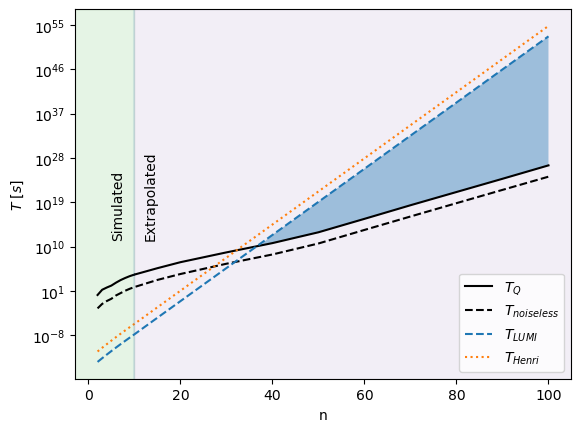

In [23]:
bg_color = [plt.cm.Accent(i) for i in range(2)]
n_limit = N_simulated['n'].to_numpy()[-1]


plt.plot(RE['n'], RE['FT_runtime[s]'], color='black', label='$T_Q$')
plt.plot(RE['n'], RE['noiseless_runtime[s]'], color='black', linestyle='--', label='$T_{noiseless}$')
plt.plot(RE['n'], RE['LUMI_runtime'], color='#1f77b4', linestyle='--', label='$T_{LUMI}$')
plt.plot(RE['n'], RE['Henri_runtime'], color='#ff7f0e', linestyle='dotted', label='$T_{Henri}$')


left,right = plt.xlim()

#plt.axvline(37)
#plt.axhline(1.0e10)

plt.axvline(n_limit, alpha=0.1)
plt.axvspan(-10, n_limit, alpha=0.2, color=bg_color[0])
plt.axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

plt.text(n_limit-5,1.e12,'Simulated', rotation='vertical')
plt.text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')

plt.fill_between(df_advantage_T['n'], df_advantage_T['FT_runtime[s]'], df_advantage_T['LUMI_runtime'], alpha = .4)
plt.yscale('log')
plt.legend()
plt.xlabel('n')
plt.ylabel(r'$T\ [s]$')
plt.xlim((left,right))
#plt.savefig('imgs/T_advantage.pdf', transparent = True)
plt.show()

In [24]:
df_advantage_E = RE[RE['Henri_E_MAX'] >= RE['FTEnergy[J]']]

In [25]:
df_advantage_E = RE[RE['Henri_E_MAX'] >= RE['FTEnergy[J]']]
df_advantage_E = df_advantage_E[['n', 'FTEnergy[J]','Henri_E_MAX']]
# By hand
nE_adv = 32
E_adv = 1.0e14

df_advantage_E.loc[-1] = [nE_adv, E_adv, E_adv]  # adding a row
df_advantage_E.index = df_advantage_E.index + 1  # shifting index
df_advantage_E.sort_index(inplace=True) 

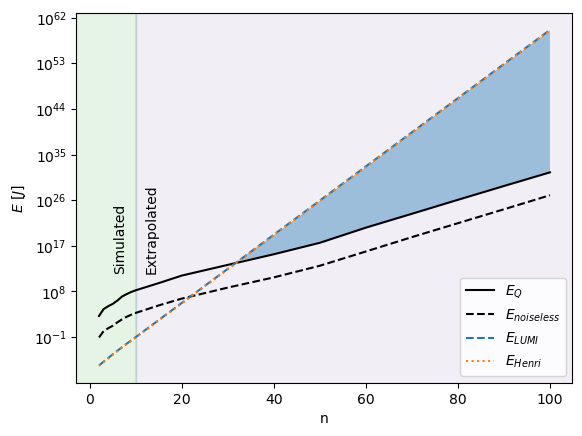

In [26]:
bg_color = [plt.cm.Accent(i) for i in range(2)]
n_limit = N_simulated['n'].to_numpy()[-1]


plt.plot(RE['n'], RE['FTEnergy[J]'], color='black', label='$E_Q$')
plt.plot(RE['n'], RE['Energy[J]'], color='black', linestyle='--', label='$E_{noiseless}$')
plt.plot(RE['n'], RE['LUMI_E_MAX'], color='#1f77b4', linestyle='--', label='$E_{LUMI}$')
plt.plot(RE['n'], RE['Henri_E_MAX'], color='#ff7f0e', linestyle='dotted', label='$E_{Henri}$')


left,right = plt.xlim()

#plt.axvline(32)
#plt.axhline(1.0e10)

plt.axvline(n_limit, alpha=0.1)
plt.axvspan(-10, n_limit, alpha=0.2, color=bg_color[0])
plt.axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

plt.text(n_limit-5,1.e12,'Simulated', rotation='vertical')
plt.text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')

plt.fill_between(df_advantage_E['n'], df_advantage_E['FTEnergy[J]'], df_advantage_E['Henri_E_MAX'], alpha = .4)
plt.yscale('log')
plt.legend()
plt.xlabel('n')
plt.ylabel(r'$E\ [J]$')
plt.xlim((left,right))
#plt.savefig('imgs/E_advantage.pdf', transparent = True)
plt.show()

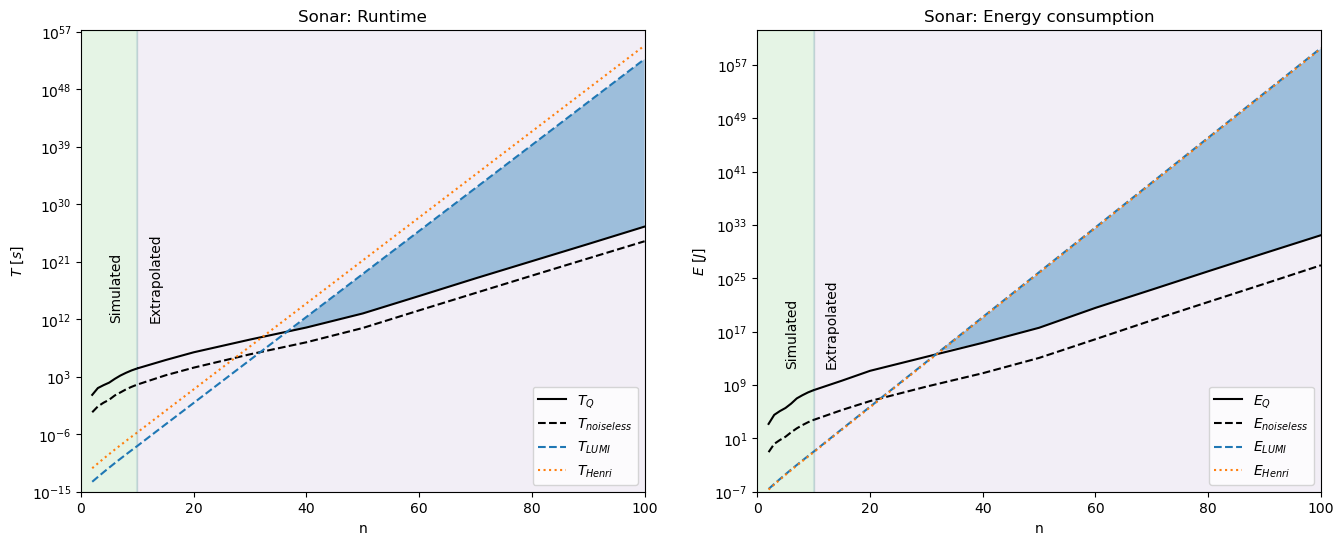

In [27]:
#color = cm.rainbow(np.linspace(0, 1, N_SR_FQ.shape[0]))

#bg_color = [plt.cm.Accent(i) for i in range(2)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##############RUNTIME

bg_color = [plt.cm.Accent(i) for i in range(2)]
n_limit = N_simulated['n'].to_numpy()[-1]

ax[0].plot(RE['n'], RE['FT_runtime[s]'], color='black', label='$T_Q$')
ax[0].plot(RE['n'], RE['noiseless_runtime[s]'], color='black', linestyle='--', label='$T_{noiseless}$')
ax[0].plot(RE['n'], RE['LUMI_runtime'], color='#1f77b4', linestyle='--', label='$T_{LUMI}$')
ax[0].plot(RE['n'], RE['Henri_runtime'], color='#ff7f0e', linestyle='dotted', label='$T_{Henri}$')

#plt.axvline(50)
#plt.axhline(5.0e5)

ax[0].axvline(n_limit, alpha=0.1)
ax[0].axvspan(-10, n_limit, alpha=0.2, color=bg_color[0])
ax[0].axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

ax[0].text(n_limit-5,1.e12,'Simulated', rotation='vertical')
ax[0].text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')

ax[0].fill_between(df_advantage_T['n'], df_advantage_T['FT_runtime[s]'], df_advantage_T['LUMI_runtime'], alpha = .4)
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel('n')
ax[0].set_ylabel(r'$T\ [s]$')
ax[0].set_xlim((0,100))
ax[0].set_ylim((1.e-15,2.e57))
ax[0].set_title(r'Sonar: Runtime')

##############
##############ENERGY
ax[1].plot(RE['n'], RE['FTEnergy[J]'], color='black', label='$E_Q$')
ax[1].plot(RE['n'], RE['Energy[J]'], color='black', linestyle='--', label='$E_{noiseless}$')
ax[1].plot(RE['n'], RE['LUMI_E_MAX'], color='#1f77b4', linestyle='--', label='$E_{LUMI}$')
ax[1].plot(RE['n'], RE['Henri_E_MAX'], color='#ff7f0e', linestyle='dotted', label='$E_{Henri}$')

#plt.axvline(26)
#plt.axhline(2.0e9)

ax[1].axvline(n_limit, alpha=0.1)
ax[1].axvspan(-10, n_limit, alpha=0.2, color=bg_color[0])
ax[1].axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

ax[1].text(n_limit-5,1.e12,'Simulated', rotation='vertical')
ax[1].text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')

ax[1].fill_between(df_advantage_E['n'], df_advantage_E['FTEnergy[J]'], df_advantage_E['Henri_E_MAX'], alpha = .4)
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel('n')
ax[1].set_ylabel(r'$E\ [J]$')
ax[1].set_xlim((0,100))
ax[1].set_ylim((1.e-7,2.e62))
ax[1].set_title(r'Sonar: Energy consumption')
##############

#plt.savefig('imgs/resource_comparison_sonar.pdf', transparent=True, bbox_inches='tight')
plt.show()